# Universidade de Brasília - UnB

Campus UnB Gama - FGA

CURSOS: Engenharia de Software e Engenharia Eletrônica

DISCIPLINA: Tópicos Especiais em Software e Eletrônica

CONTEÚDO: Métodos Quantitativos em Finanças

ALUNO: Eduardo Sousa S. Rodrigues MATRÍCULA: 140038558

## Trabalho 1

### 1) Considerando os índices da Bovespa, pertencente aos conjuntos Setorial ou por Segmento, (i) escolha aos seu critério 5 (cinco) índices e entre esses escolhidos os 5 (cinco) papeis mais líquidos. http://www.bmfbovespa.com.br/pt_br/produtos/indices/

Os índices escolhidos são do conjunto Setorial, mais especificamente os que compõem a carteira do IMOB( Índice Imobiliário): http://www.bmfbovespa.com.br/pt_br/produtos/indices/indices-setoriais/indice-bm-fbovespa-imobiliario-imob-composicao-da-carteira.htm 

Para definir os 5 mais Líquidos, foi calculadada a média de volume diário de cada índice. Os que obtiveram maior volume diário médio, teoricamente possuem maior liquidez.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Set 21 09:11:31 2018

@author:Eduardo S. Sales
Universidade de Brasilia - UnB
"""
%matplotlib notebook 
#import plotly.plotly as py
#import plotly.graph_objs as go
import datetime
from pandas import *
import matplotlib.mlab as mlab
import scipy.signal as signal
import matplotlib.pyplot as plt
#import matplotlib.dates as mdates
#import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
#from matplotlib.finance import candlestick_ohlc
#import urllib
import xlrd
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as pdr
import fix_yahoo_finance as yf
import datetime as dt
import seaborn as sns
sns.set()

In [2]:
def yahoo(symbols,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year):
    yf.pdr_override()        
    stocks_yahoo = pdr.get_data_yahoo(symbols, start=datetime(S_Year, S_Month, S_Day), end=datetime(E_Year, E_Month, E_Day),   as_panel = False,)
    return stocks_yahoo


In [3]:
frame = []
book = xlrd.open_workbook("indices.xlsx")
for i in range(book.nsheets):
    dataframe_excel = pd.read_excel("indices.xlsx",sheet_name=i, header=0)[:-2]
    dataframe_excel['Indices']=book.sheet_names()[i]
    frame.append(dataframe_excel[:-2])
dataframe_i=pd.concat(frame)  
dataframe_i.columns = ['Codigo','Ação','Tipo','Qtd.','Part.','I_Name']
dataframe_i.head()

,Codigo,Ação,Tipo,Qtd.,Part.,I_Name
0,ABEV3,AMBEV S/A,ON,3.188072e+09,18.179,ICON
1,ALPA4,ALPARGATAS,PN N1,1.504626e+08,0.643,ICON
2,AMAR3,LOJAS MARISA,ON NM,5.307442e+07,0.070,ICON
3,ANIM3,ANIMA,ON NM,3.589651e+07,0.174,ICON
4,ARZZ3,AREZZO CO,ON ED NM,4.413731e+07,0.637,ICON


In [4]:
df_ICON = dataframe_i[dataframe_i['I_Name'] == 'ICON']
df_IDIV = dataframe_i[dataframe_i['I_Name'] == 'IDIV']
df_IEE = dataframe_i[dataframe_i['I_Name'] == 'IEE']
df_IFNC = dataframe_i[dataframe_i['I_Name'] == 'IFNC']
df_IMAT = dataframe_i[dataframe_i['I_Name'] == 'IMAT']
df_IMOB = dataframe_i[dataframe_i['I_Name'] == 'IMOB']
df_INDX = dataframe_i[dataframe_i['I_Name'] == 'INDX']
df_IVBX2 = dataframe_i[dataframe_i['I_Name'] == 'IVBX 2']
df_MLCX =  dataframe_i[dataframe_i['I_Name'] == 'MLCX']
df_SMLL = dataframe_i[dataframe_i['I_Name'] == 'SMLL']
df_UTIL = dataframe_i[dataframe_i['I_Name'] == 'UTIL']

In [5]:
def read_ind(dataframe):
    Stocks= dataframe
    #Stocks=['ALSC3','BRML3', 'BRPR3','CYRE3','DIRR3','EVEN3','EZTC3','GFSA3','HBOR3','IGTA3','MRVE3','MULT3','TEND3']
    Stocks=[Stocks[k]+'.SA' for k in range(len(Stocks))]

    N_months=24
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    return stocks_all

In [11]:
ativos_ICON = read_ind(df_ICON['Codigo'])

[*********************100%***********************]  52 of 52 downloaded


In [12]:
ativos_IDIV = read_ind(df_IDIV['Codigo'])

[*********************100%***********************]  31 of 31 downloaded


In [13]:
ativos_IEE = read_ind(df_IEE['Codigo'])

[*********************100%***********************]  18 of 18 downloaded


In [14]:
ativos_IFNC = read_ind(df_IFNC['Codigo'])

[*********************100%***********************]  14 of 14 downloaded


In [15]:
ativos_IMAT = read_ind(df_IMAT['Codigo'])

[*********************100%***********************]  11 of 11 downloaded


In [16]:
ativos_IMOB = read_ind(df_IMOB['Codigo'])

[*********************100%***********************]  11 of 11 downloaded


In [17]:
ativos_INDX = read_ind(df_INDX['Codigo'])

[*********************100%***********************]  42 of 42 downloaded


In [18]:
ativos_IVBX2 = read_ind(df_IVBX2['Codigo'])

[*********************100%***********************]  48 of 48 downloaded


In [20]:
ativos_IMLCX = read_ind(df_MLCX['Codigo'])

[*********************100%***********************]  59 of 59 downloaded


In [21]:
ativos_SMLL = read_ind(df_SMLL['Codigo'])

[*********************100%***********************]  75 of 75 downloaded


In [22]:
ativos_UTIL = read_ind(df_UTIL['Codigo'])

[*********************100%***********************]  20 of 20 downloaded


In [23]:
print(ativos_ICON.fillna(0).head())
print(ativos_IDIV.fillna(0).head())
print(ativos_IEE.fillna(0).head())
print(ativos_IFNC.fillna(0).head())
print(ativos_IMAT.fillna(0).head())
print(ativos_IMOB.fillna(0).head())
print(ativos_INDX.fillna(0).head())
print(ativos_IVBX2.fillna(0).head())
print(ativos_IMLCX.fillna(0).head())
print(ativos_SMLL.fillna(0).head())
print(ativos_UTIL.fillna(0).head())

                 Open                                                          \
             ABEV3.SA ALPA4.SA AMAR3.SA ANIM3.SA   ARZZ3.SA BEEF3.SA BKBR3.SA   
Date                                                                            
2016-10-17  19.480000    10.44     7.47    12.64  27.420000    10.45      0.0   
2016-10-18  19.559999    10.49     7.41    12.91  27.870001    10.29      0.0   
2016-10-19  19.639999    10.37     7.44    14.06  28.500000    10.30      0.0   
2016-10-20  19.690001    10.20     7.13    14.10  29.750000    10.20      0.0   
2016-10-21  19.670000    10.20     7.31    14.17  31.209999    10.16      0.0   

                                            ...      Volume                    \
             BRFS3.SA   BTOW3.SA CAML3.SA   ...    PARD3.SA PCAR4.SA QUAL3.SA   
Date                                        ...                                 
2016-10-17  55.160000  15.186600      0.0   ...         0.0   454200  3538800   
2016-10-18  54.610001  15.9

                 Open                                                         \
             ABEV3.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA   
Date                                                                           
2016-10-17  19.480000  17.690001  25.799999  25.049601  25.727301  31.430000   
2016-10-18  19.559999  17.990000  27.549999  25.314100  26.157000  31.920000   
2016-10-19  19.639999  17.830000  28.049999  25.818199  26.677700  32.270000   
2016-10-20  19.690001  18.180000  27.209999  25.388399  26.281000  32.000000   
2016-10-21  19.670000  18.540001  28.080000  25.652901  26.809900  32.389999   

                                                       ...       Volume  \
           BPAC11.SA BRDT3.SA   BRFS3.SA   BRKM5.SA    ...     RAIL3.SA   
Date                                                   ...                
2016-10-17       0.0      0.0  55.160000  27.209999    ...      6895600   
2016-10-18       0.0      0.0  54.610001  27.590000    ... 

In [24]:
def maisLiquidos(ativos):
    media_volume = ativos['Volume'].fillna(0).mean()
    mediaVolume = pd.DataFrame.from_dict(media_volume)
    mediaVolume.columns=["Média"]
    mediaVolume.sort_values('Média',ascending=False)
    MaisLiquidos = mediaVolume.sort_values('Média',ascending=False).iloc[:5]
    return MaisLiquidos

In [25]:
Liquidos_ICON = maisLiquidos(ativos_ICON)
Liquidos_IDIV = maisLiquidos(ativos_IDIV)
Liquidos_IEE = maisLiquidos(ativos_IEE)
Liquidos_IFNC = maisLiquidos(ativos_IFNC)
Liquidos_IMAT = maisLiquidos(ativos_IMAT)
Liquidos_IMOB = maisLiquidos(ativos_IMOB)
Liquidos_INDX = maisLiquidos(ativos_INDX)
Liquidos_IVBX2 = maisLiquidos(ativos_IVBX2)
Liquidos_IMLCX = maisLiquidos(ativos_IMLCX)
Liquidos_SMLL = maisLiquidos(ativos_SMLL)
Liquidos_UTIL = maisLiquidos(ativos_UTIL)
ativosLiquidos = [Liquidos_ICON,Liquidos_IDIV,Liquidos_IEE,Liquidos_IFNC,Liquidos_IMAT,Liquidos_IMOB,Liquidos_INDX,
                 Liquidos_IVBX2, Liquidos_IMLCX,Liquidos_SMLL,Liquidos_UTIL]
ativosLiquidos=pd.concat(ativosLiquidos)

In [26]:
all_Liquidos=ativosLiquidos.sort_values('Média',ascending=False).drop_duplicates()
all_Liquidos

,Média
PETR4.SA,4.827562e+07
ITSA4.SA,1.859390e+07
USIM5.SA,1.684226e+07
GOAU4.SA,1.569880e+07
ABEV3.SA,1.361334e+07
VALE3.SA,1.274863e+07
BBDC4.SA,1.188485e+07
ITUB4.SA,1.187230e+07
GGBR4.SA,1.071610e+07
JBSS3.SA,1.060587e+07


In [27]:
all_Liquidos.iloc[:5]

,Média
PETR4.SA,4.827562e+07
ITSA4.SA,1.859390e+07
USIM5.SA,1.684226e+07
GOAU4.SA,1.569880e+07
ABEV3.SA,1.361334e+07


In [28]:
Liquidos=pd.DataFrame(all_Liquidos.index)
#Liquidos = Liquidos.drop('Codes',axis=1).drop(0,axis=1)

In [29]:
Liquidos.columns = ['Code']

In [36]:
baixar=pd.DataFrame(Liquidos)
baixar

,Code
0,PETR4.SA
1,ITSA4.SA
2,USIM5.SA
3,GOAU4.SA
4,ABEV3.SA
5,VALE3.SA
6,BBDC4.SA
7,ITUB4.SA
8,GGBR4.SA
9,JBSS3.SA


### 2) Identifique (ii) a correlação entre os preços e os retornos. E refaça a escolha dos papeis, de forma que a correlação entre eles nunca fique acima de 0.8.

Primeiro foi separado o 5 escolhidos, em seguida separado apenas o preço de fechamento par obter os retornos deles. Por fim foi feita a correlação entre os índices em relação aos retornos e em relação aos preçõs de fechamento.

In [54]:
def read_ativ(dataframe):
    Stocks= dataframe
    #Stocks=['ALSC3','BRML3', 'BRPR3','CYRE3','DIRR3','EVEN3','EZTC3','GFSA3','HBOR3','IGTA3','MRVE3','MULT3','TEND3']
    Stocks=[Stocks[k] for k in range(len(Stocks))]

    N_months=24
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stocks,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    return stocks_all

In [119]:
melhores_ativos = read_ativ(baixar['Code']) 

[*********************100%***********************]  34 of 34 downloaded


In [121]:
a = np.zeros((34,34), dtype=np.float64)
for i in range(34):
    for j in range(34):
        teste = melhores_ativos['Close'].fillna(0).corr().iloc[i:i+1,j:j+1]
        if (teste<0.8).bool() & (teste>-0.8).bool():
            a[i][j] = 0
        else:
            a[i][j] = 100

<IPython.core.display.Javascript object>


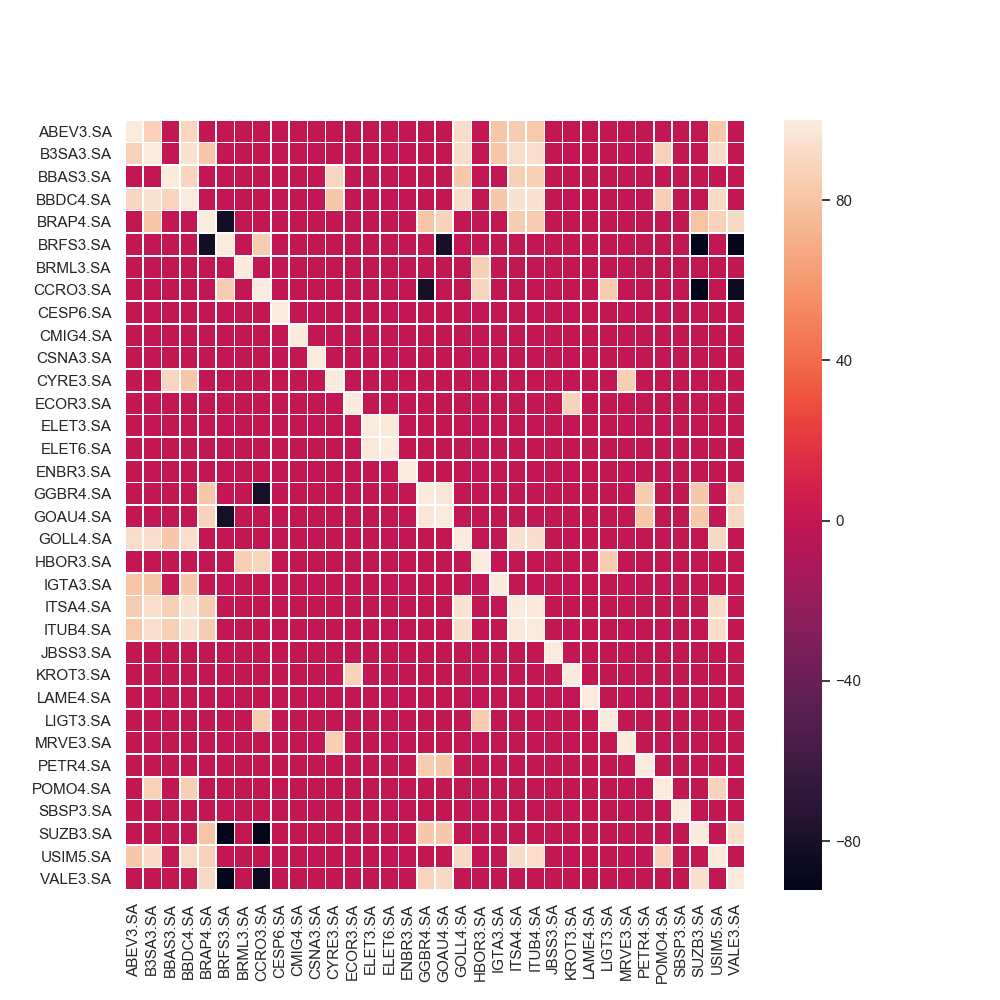

In [126]:
corre_close=melhores_ativos['Close'].fillna(0).corr()*a
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corre, annot=False, linewidths=.5, ax=ax)

In [127]:
corre_close

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRAP4.SA,BRFS3.SA,BRML3.SA,CCRO3.SA,CESP6.SA,CMIG4.SA,...,KROT3.SA,LAME4.SA,LIGT3.SA,MRVE3.SA,PETR4.SA,POMO4.SA,SBSP3.SA,SUZB3.SA,USIM5.SA,VALE3.SA
ABEV3.SA,100.000000,87.013689,0.000000,89.661861,0.000000,-0.000000,0.000000,-0.000000,-0.0,-0.0,...,0.000000,0.0,-0.000000,0.00000,0.000000,0.000000,0.0,0.000000,82.657778,0.000000
B3SA3.SA,87.013689,100.000000,0.000000,94.881761,81.663180,-0.000000,0.000000,-0.000000,-0.0,-0.0,...,0.000000,0.0,-0.000000,0.00000,0.000000,86.736262,0.0,0.000000,91.819565,0.000000
BBAS3.SA,0.000000,0.000000,100.000000,88.513466,0.000000,-0.000000,0.000000,-0.000000,0.0,0.0,...,0.000000,0.0,-0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
BBDC4.SA,89.661861,94.881761,88.513466,100.000000,0.000000,-0.000000,0.000000,-0.000000,-0.0,-0.0,...,0.000000,0.0,-0.000000,0.00000,0.000000,85.518372,0.0,0.000000,91.185214,0.000000
BRAP4.SA,0.000000,81.663180,0.000000,0.000000,100.000000,-83.050937,-0.000000,-0.000000,0.0,-0.0,...,-0.000000,0.0,-0.000000,0.00000,0.000000,0.000000,-0.0,80.058149,86.579095,90.573578
BRFS3.SA,-0.000000,-0.000000,-0.000000,-0.000000,-83.050937,100.000000,0.000000,84.674622,-0.0,0.0,...,0.000000,0.0,0.000000,-0.00000,-0.000000,-0.000000,0.0,-91.727927,-0.000000,-89.917930
BRML3.SA,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,100.000000,0.000000,-0.0,0.0,...,0.000000,0.0,0.000000,0.00000,-0.000000,0.000000,0.0,-0.000000,0.000000,-0.000000
CCRO3.SA,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,84.674622,0.000000,100.000000,-0.0,0.0,...,0.000000,0.0,83.920216,0.00000,-0.000000,-0.000000,0.0,-92.167731,-0.000000,-86.060780
CESP6.SA,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,100.0,0.0,...,-0.000000,0.0,0.000000,0.00000,0.000000,-0.000000,-0.0,0.000000,-0.000000,0.000000
CMIG4.SA,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.0,100.0,...,-0.000000,0.0,0.000000,0.00000,-0.000000,-0.000000,0.0,-0.000000,-0.000000,-0.000000


In [143]:
close = melhores_ativos['Close'].fillna(0)
Close = pd.DataFrame.from_dict(close)
Close

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRAP4.SA,BRFS3.SA,BRML3.SA,CCRO3.SA,CESP6.SA,CMIG4.SA,...,KROT3.SA,LAME4.SA,LIGT3.SA,MRVE3.SA,PETR4.SA,POMO4.SA,SBSP3.SA,SUZB3.SA,USIM5.SA,VALE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-17,19.559999,17.799999,27.480000,26.165300,10.750000,54.349998,11.38260,17.500000,14.340000,8.72435,...,15.900000,20.799999,17.510000,12.27,16.900000,3.49071,31.480000,0.000000,3.58,18.240000
2016-10-18,19.650000,17.830000,28.049999,26.801600,11.370000,54.270000,11.80000,17.900000,14.250000,8.67589,...,16.580000,21.520000,17.559999,12.60,17.420000,3.51066,31.639999,0.000000,3.65,18.770000
2016-10-19,19.680000,18.230000,27.530001,26.611601,11.280000,53.290001,11.88700,17.680000,14.150000,8.66619,...,16.900000,21.219999,17.500000,12.61,17.620001,3.40095,31.990000,0.000000,3.68,18.620001
2016-10-20,19.650000,18.600000,28.100000,27.000000,11.610000,53.759998,11.78260,17.500000,14.650000,8.57895,...,16.500000,20.940001,17.280001,12.52,17.740000,3.41093,32.110001,0.000000,3.72,19.100000
2016-10-21,19.750000,18.600000,28.450001,26.743799,12.080000,53.439999,11.73040,17.639999,14.670000,8.44324,...,16.549999,21.250000,17.600000,12.48,17.950001,3.31119,32.150002,0.000000,3.96,19.910000
2016-10-24,19.700001,18.660000,28.219999,26.487600,12.170000,53.220001,11.75650,17.459999,14.650000,8.56925,...,16.160000,21.299999,17.440001,12.73,18.200001,3.38101,31.900000,0.000000,4.08,20.299999
2016-10-25,19.530001,18.400000,27.549999,26.363600,12.890000,52.700001,11.56520,17.450001,14.740000,8.78252,...,15.830000,20.940001,17.260000,12.55,18.000000,3.39098,32.290001,0.000000,4.18,21.350000
2016-10-26,19.540001,18.450001,27.340000,26.256201,13.020000,52.500000,11.47830,17.440001,14.920000,8.93762,...,15.730000,20.870001,16.990000,12.65,18.100000,3.39098,32.590000,0.000000,4.11,21.770000
2016-10-27,19.500000,18.500000,28.740000,26.694201,13.150000,52.480000,11.26090,17.270000,15.070000,9.18965,...,15.700000,20.799999,17.299999,12.75,18.090000,3.29125,32.750000,0.000000,4.16,22.000000


In [156]:
np.log(Close[0:]).fillna(0)

d:\python3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRAP4.SA,BRFS3.SA,BRML3.SA,CCRO3.SA,CESP6.SA,CMIG4.SA,...,KROT3.SA,LAME4.SA,LIGT3.SA,MRVE3.SA,PETR4.SA,POMO4.SA,SBSP3.SA,SUZB3.SA,USIM5.SA,VALE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-17,2.973487,2.879198,3.313458,3.264434,2.374906,3.995445,2.432086,2.862201,2.663053,2.166118,...,2.766319,3.034953,2.862772,2.507157,2.827314,1.250105,3.449352,-inf,1.275363,2.903617
2016-10-18,2.978077,2.880882,3.333989,3.288462,2.430978,3.993972,2.468100,2.884801,2.656757,2.160548,...,2.808197,3.068983,2.865624,2.533697,2.857619,1.255804,3.454422,-inf,1.294727,2.932260
2016-10-19,2.979603,2.903069,3.315276,3.281347,2.423031,3.975749,2.475445,2.872434,2.649715,2.159429,...,2.827314,3.054944,2.862201,2.534490,2.869035,1.224055,3.465423,-inf,1.302913,2.924236
2016-10-20,2.978077,2.923162,3.335770,3.295837,2.451867,3.984530,2.466624,2.862201,2.684440,2.149312,...,2.803360,3.041661,2.849550,2.527327,2.875822,1.226985,3.469168,-inf,1.313724,2.949688
2016-10-21,2.983153,2.923162,3.348148,3.286303,2.491551,3.978560,2.462184,2.870169,2.685805,2.133366,...,2.806386,3.056357,2.867899,2.524127,2.887590,1.197308,3.470413,-inf,1.376244,2.991222
2016-10-24,2.980619,2.926382,3.340031,3.276677,2.498974,3.974434,2.464406,2.859912,2.684440,2.148180,...,2.782539,3.058707,2.858766,2.543961,2.901422,1.218174,3.462606,-inf,1.406097,3.010621
2016-10-25,2.971952,2.912351,3.316002,3.271984,2.556452,3.964615,2.448001,2.859340,2.690565,2.172763,...,2.761907,3.041661,2.848392,2.529721,2.890372,1.221119,3.474758,-inf,1.430311,3.061052
2016-10-26,2.972464,2.915064,3.308351,3.267902,2.566487,3.960813,2.440458,2.858766,2.702703,2.190269,...,2.755570,3.038313,2.832625,2.537657,2.895912,1.221119,3.484005,-inf,1.413423,3.080533
2016-10-27,2.970414,2.917771,3.358290,3.284446,2.576422,3.960432,2.421337,2.848971,2.712706,2.218078,...,2.753661,3.034953,2.850706,2.545531,2.895359,1.191267,3.488903,-inf,1.425515,3.091042


In [166]:
Retorno =100*((Close[1:])-(Close[0:-1]))

In [165]:
Retorno

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BRAP4.SA,BRFS3.SA,BRML3.SA,CCRO3.SA,CESP6.SA,CMIG4.SA,...,KROT3.SA,LAME4.SA,LIGT3.SA,MRVE3.SA,PETR4.SA,POMO4.SA,SBSP3.SA,SUZB3.SA,USIM5.SA,VALE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2016-10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2016-10-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2016-10-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2016-10-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2016-10-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2016-10-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2016-10-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2016-10-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


In [ ]:
close = liquidos_all['Close'].fillna(0)
Close = pd.DataFrame.from_dict(close)

Close

In [ ]:
retorno_BRML3 = Close['BRML3.SA'][1:].values/Close['BRML3.SA'][0:-1].values-1
retorno_CYRE3 = Close['CYRE3.SA'][1:].values/Close['CYRE3.SA'][0:-1].values-1
retorno_HBOR3 = Close['HBOR3.SA'][1:].values/Close['HBOR3.SA'][0:-1].values-1
retorno_MRVE3 = Close['MRVE3.SA'][1:].values/Close['MRVE3.SA'][0:-1].values-1
retorno_MULT3 = Close['MULT3.SA'][1:].values/Close['MULT3.SA'][0:-1].values-1
Retorno = {'R_BRML3': retorno_BRML3,
           'R_CYRE3': retorno_CYRE3,
           'R_HBOR3': retorno_HBOR3,
           'R_MRVE3': retorno_MRVE3,
           'R_MULT3': retorno_MULT3}
dfRetorno = pd.DataFrame(Retorno,index = Close.index[0:-1],columns =['R_BRML3','R_CYRE3','R_HBOR3','R_MRVE3','R_MULT3'])
dfRetorno.corr()

In [ ]:
Close.corr()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import mpl_finance
from mpl_finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt
import csv

### 3) Apresente (iii) os gráficos de preço no formato candlestick, (iv) o gráfico de retorno, (v) o índice Sharpe e o (vi) fator Beta com relação ao índice Bovespa.

In [ ]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter
    

In [ ]:
def read(symbol):
    Stock=[symbol]
    Stock=[Stock[k]+'.SA' for k in range(len(Stock))]

    N_months=24
    today = dt.date.today()
    E_Day = today.day; E_Month = today.month; E_Year = today.year
    day_before=today - dt.timedelta(days=N_months*365/12)
    S_Day = day_before.day; S_Month = day_before.month; S_Year = day_before.year

    stocks_all=yahoo(Stock,S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)
    return stocks_all

In [ ]:
dfBRML3 = read('BRML3').fillna(0)
dfMRVE3 = read('MRVE3').fillna(0)
dfMULT3 = read('MULT3').fillna(0)
dfCYRE3 = read('CYRE3').fillna(0)
dfHBOR3 = read('HBOR3').fillna(0)

In [ ]:
dfBRML3.to_csv('BRML3.csv')
dfMRVE3.to_csv('MRVE3.csv')
dfMULT3.to_csv('MULT3.csv')
dfCYRE3.to_csv('CYRE3.csv')
dfHBOR3.to_csv('HBOR3.csv')

dfBRML3 = pd.read_csv('BRML3.csv', parse_dates=True, index_col=0)
dfMRVE3 = pd.read_csv('MRVE3.csv', parse_dates=True, index_col=0)
dfMULT3 = pd.read_csv('MULT3.csv', parse_dates=True, index_col=0)
dfCYRE3 = pd.read_csv('CYRE3.csv', parse_dates=True, index_col=0)
dfHBOR3 = pd.read_csv('HBOR3.csv', parse_dates=True, index_col=0) 


In [ ]:
ohlc_BRML3 = dfBRML3['Adj Close'].resample('10D').ohlc()
ohlc_MRVE3 = dfMRVE3['Adj Close'].resample('10D').ohlc()
ohlc_MULT3 = dfMULT3['Adj Close'].resample('10D').ohlc()
ohlc_CYRE3 = dfCYRE3['Adj Close'].resample('10D').ohlc()
ohlc_HBOR3 = dfHBOR3['Adj Close'].resample('10D').ohlc()

volume_BRML3 = dfBRML3['Volume'].resample('10D').sum()
volume_MRVE3 = dfMRVE3['Volume'].resample('10D').sum()
volume_MULT3 = dfMULT3['Volume'].resample('10D').sum()
volume_CYRE3 = dfCYRE3['Volume'].resample('10D').sum()
volume_HBOR3 = dfHBOR3['Volume'].resample('10D').sum()

In [ ]:
ohlc_MRVE3.reset_index(level=0, inplace=True)
ohlc_BRML3.reset_index(level=0, inplace=True)
ohlc_MULT3.reset_index(level=0, inplace=True)
ohlc_CYRE3.reset_index(level=0, inplace=True)
ohlc_HBOR3.reset_index(level=0, inplace=True)

In [ ]:
ohlc_BRML3['Date']=ohlc_BRML3['Date'].map(mdates.date2num)
ohlc_MRVE3['Date']=ohlc_MRVE3['Date'].map(mdates.date2num)
ohlc_MULT3['Date']=ohlc_MULT3['Date'].map(mdates.date2num)
ohlc_CYRE3['Date']=ohlc_CYRE3['Date'].map(mdates.date2num)
ohlc_HBOR3['Date']=ohlc_HBOR3['Date'].map(mdates.date2num)

In [ ]:
def graph_ohlc (ohlc, name):
    fig = plt.figure()
    ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(name)

    ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1, sharex=ax1)
    #ax1.xaxis_date()

    candlestick_ohlc(ax1, ohlc.values, width=2, colorup='g')
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)

    ax2.fill_between(volume_BRML3.index.map(mdates.date2num), volume_BRML3.values, 0)

    for label in ax2.xaxis.get_ticklabels():
            label.set_rotation(45)

    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

In [ ]:
graph_ohlc(ohlc_BRML3, "BRML3")

In [ ]:
graph_ohlc(ohlc_MRVE3, "MRVE3")

In [ ]:
graph_ohlc(ohlc_MULT3,"MULT3")

In [ ]:
graph_ohlc(ohlc_CYRE3,"CYRE3")

In [ ]:
graph_ohlc(ohlc_HBOR3,"HBOR3")

In [ ]:
#fig = plt.subplots()
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(10,10))
ax[0,0].plot(dfRetorno['R_BRML3'], label='Retorno de BRML3')
ax[1,0].plot(dfRetorno['R_CYRE3'], label='Retorno 1')
ax[2,0].plot(dfRetorno['R_HBOR3'], label='Retorno 2')
ax[0,1].plot(dfRetorno['R_MRVE3'], label='Retorno 3')
ax[1,1].plot(dfRetorno['R_MULT3'], label='Retorno 4')

ax[0,0].set_ylabel("Preço [R$]")
ax[0,0].set_xlabel("Data")
ax[0,0].set_title("Retornos")
ax[0,0].legend(loc='upper left')


ax[1,0].set_ylabel("Preço [R$]")
ax[1,0].set_xlabel("Data")
ax[1,0].set_title("Retornos")
ax[1,0].legend(loc='upper left')


ax[2,0].set_ylabel("Preço [R$]")
ax[2,0].set_xlabel("Data")
ax[2,0].set_title("Retornos")
ax[2,0].legend(loc='upper left')

ax[0,1].set_ylabel("Preço [R$]")
ax[0,1].set_xlabel("Data")
ax[0,1].set_title("Retornos")
ax[0,1].legend(loc='upper left')


ax[1,1].set_ylabel("Preço [R$]")
ax[1,1].set_xlabel("Data")
ax[1,1].set_title("Retornos")
ax[1,1].legend(loc='upper left')
#plt.plot(dfRetorno['R_BRML3'])


In [ ]:
IBVS=yahoo("^BVSP",S_Day, S_Month, S_Year, E_Day, E_Month, E_Year)

In [ ]:
IBVS = pd.DataFrame.from_dict(IBVS)
retorno_IBVS = IBVS['Close'][1:].values/IBVS['Close'][0:-1].values-1

In [ ]:
retorno_IBVS